In [96]:
import pandas as pd 
import numpy as np
import glob as glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
pd.read_csv

<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

In [5]:
ls

00__Test_Installation.ipynb
01__Descriptive_Statistics.ipynb
02__Data_Visualization.ipynb
02__Data_Visualization_Elliot.ipynb
03.5__Converting_Z-scores_to_Probability.ipynb
03__Normal_Distribution_and_CLT.ipynb
Installation_Instructions.md
README.md
SQL-Challange.txt
Untitled.ipynb
datasets/
img/
make_school_data.ipynb
untitled


In [6]:
MakeSchool_2017 = 'datasets/makeschool_data/2017/Student Feedback Surveys-Superview.csv'
df = pd.read_csv(MakeSchool_2017)
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


In [75]:
df.describe()

,ID
count,1453.000000
mean,759.235375
std,430.911349
min,8.000000
25%,387.000000
50%,764.000000
75%,1132.000000
max,1499.000000


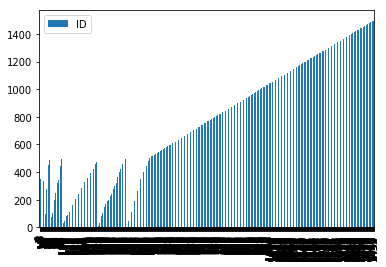

In [8]:
df.plot.bar()

AttributeError: 'str' object has no attribute 'get'

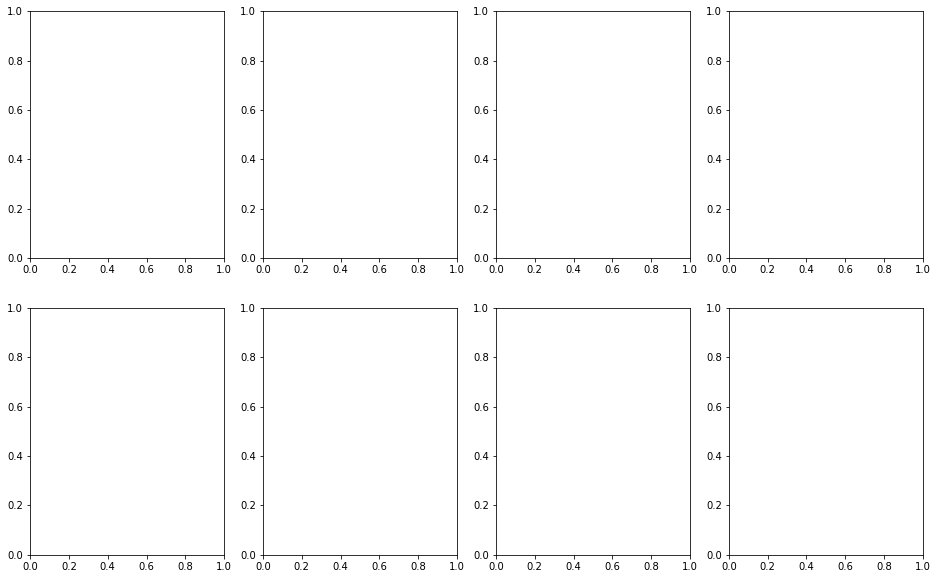

In [10]:
figs,axes = plt.subplots(2, 4, figsize=(16, 10), sharex=False, sharey=False)
sns.countplot(x='Week', data=MakeSchool_2016, ax=axes[0, 0])

In [97]:
pwd

'/Users/briantoliveira/Desktop/DS-1-Data-Analysis/datasets/makeschool_data/2016'

In [123]:
#Combining all data frames of 2016
total_weeks = []

for i in range(1, 8):
    temp_list = []
    city = ""
    for name in glob.glob('./Anon Week ' + str(i) + '*'):
        city = name[25:]
        df = pd.read_csv(name)
        if city == 'Singapore.csv' or city == 'SG.csv':
             city = "Singapore"
        elif city == 'Tokyo.csv':
            city = 'Tokyo'
        elif city == 'Taipei.csv':
            city = 'Taipei'
        elif city == 'LA.csv':
            city = "Los Angeles"
        elif city == 'SF.csv':
            city = 'San Francisco'
        elif city == 'NY.csv':
            city = 'New York City'
        elif city == 'SV.csv':
            city = 'Sunnyvale'
        elif city == 'HK.csv':
            city = 'Hong Kong'
        df["Location"] = city
        temp_list.append(df)
    data_2016 = pd.concat(temp_list)
    data_2016["Week"] = i
    total_weeks.append(data_2016)
data_2016 = pd.concat(total_weeks)

In [124]:

# Combine Pacing Columns together
paces = data_2016[["How well are the tutorials paced?", "How well is the schedule paced?"]]
paces = paces["How well are the tutorials paced?"].fillna(paces["How well is the schedule paced?"])
new_paces = []
for pace in paces:
    if not pace == "#REF!":
        new_paces.append(pace)
    else:
        new_paces.append("NaN")
data_2016 = data_2016.drop("How well are the tutorials paced?", 1)
data_2016 = data_2016.drop("How well is the schedule paced?", 1)
data_2016["Schedule Pacing"] = new_paces


            

In [126]:
data_2016 = data_2016.drop("Timestamp", 1)
data_2016 = data_2016.drop("Unnamed: 0", 1)
data_2016 = data_2016.rename(columns = {"How would you rate your overall satisfaction with the Summer Academy this week?" : "Rating (Num)", "What track are you in?" : "Track"})

In [129]:
def calc_nps(num_rating):
    ratings = np.array([])
    
    for num in num_rating:
        if not num == "#REF!":
            value = float(num)
            if value > 4:
                ratings = np.append(ratings, "Promoter")
            elif value > 3:
                ratings = np.append(ratings, "Passive")
            else:
                ratings = np.append(ratings, "Detractor")
        else:
            ratings = np.append(ratings, "NaN")
    df_nps_2016 = pd.DataFrame(ratings)
    return df_nps_2016

In [130]:
rating_values = data_2016["Rating (Num)"]
data_2016["NPS Category"] = calc_nps(rating_values)
data_2016

,Rating (Num),Location,Week,Track,Schedule Pacing,NPS Category
0,2,Singapore,1,NaN,3,Detractor
1,2,Singapore,1,NaN,3,Detractor
2,3,Singapore,1,NaN,3,Detractor
3,4,Singapore,1,NaN,4,Passive
4,4,Singapore,1,NaN,4,Passive
5,4,Singapore,1,NaN,4,Passive
6,4,Singapore,1,NaN,3,Passive
7,4,Singapore,1,NaN,3,Passive
8,4,Singapore,1,NaN,4,Passive
9,4,Singapore,1,NaN,3,Passive


In [172]:
path = "Week 8 Feedback (2016, incomplete) - results.csv"
data_wk8 = pd.read_csv(path)
data_wk8 = data_wk8.drop("Start Date (UTC)", 1)
data_wk8 = data_wk8.drop("Submit Date (UTC)", 1)
data_wk8 = data_wk8.drop("#", 1)
data_wk8 = data_wk8.drop("Network ID", 1)
data_wk8 = data_wk8.rename(columns={"How likely is it that you would recommend the Make School Summer Academy to a friend?" : 'Rating (Num)'})
data_wk8 = data_wk8.rename(columns={"location" : 'Location'})
data_wk8 = data_wk8.rename(columns={"track" : 'Track'})
data_wk8["Week"] = 8
data_wk8["Schedule Pacing"] = np.nan
tracks = data_wk8['Track']
for i in range(len(tracks)):
    tracks[i] = tracks[i].replace("summer", '')
data_wk8['Track'] = tracks


/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [173]:
data_wk8 = data_wk8.sort_values(['Location', 'Track'], ascending=[1, 1])
ratings = data_wk8["Rating (Num)"]
data_wk8["NPS Category"] = calc_nps(ratings)
data_2016=data_2016.append(data_wk8)
data_2016

,Location,NPS Category,Rating (Num),Schedule Pacing,Track,Week
0,Singapore,Detractor,2,3,NaN,1
1,Singapore,Detractor,2,3,NaN,1
2,Singapore,Detractor,3,3,NaN,1
3,Singapore,Passive,4,4,NaN,1
4,Singapore,Passive,4,4,NaN,1
5,Singapore,Passive,4,4,NaN,1
6,Singapore,Passive,4,3,NaN,1
7,Singapore,Passive,4,3,NaN,1
8,Singapore,Passive,4,4,NaN,1
9,Singapore,Passive,4,3,NaN,1


In [174]:
def nps_2016():
    npsScores = []
    for i in range(1,9):
        df_each_week = data_2016[data_2016["Week"] == i]
        promotersAmount = df_each_week[df_each_week["NPS Category"] == "Promoter"].size
        detractorsAmount = df_each_week[df_each_week["NPS Category"] == "Detractor"].size
        passiveAmount = df_each_week[df_each_week["NPS Category"] == "Passive"].size
        nps = (promotersAmount - detractorsAmount) / (promotersAmount + detractorsAmount + passiveAmount)
        npsScores = np.append(npsScores, nps * 100)
    return npsScores

In [175]:
def avg_2016():
    pacing_ave = []
    for i in range(1, 9):
        df_each_week = df_2016[df_2016["Week"]==i]
        mean = np.mean(df_each_week["Schedule Pacing"])
        pacing_ave = np.append(pacing_ave, mean)
    return pacing_ave

(-100, 100)

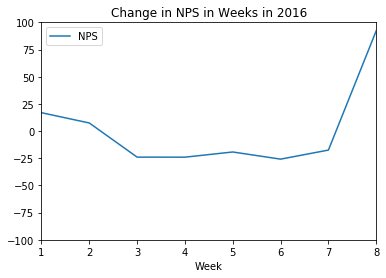

In [176]:
npsScores = nps_2016()
TNR_2016 = {"Week": [], "NPS" : []}
for i in range(1,9):
    TNR_2016["NPS"].append(npsScores[i-1])
    TNR_2016["Week"].append(i)
TNR_2016 = pd.DataFrame(TNR_2016)
TNR_2016.plot(x="Week", y="NPS", title="Change in NPS in Weeks in 2016")
plt.xlim(1,8)
plt.ylim(-100,100)

In [190]:
def week_counts_2016():
    week_counts = []
    for i in range(1, 9):
        each_week = (df_2016[(df_2016["Week"]==i)]).count
        print(each_week)
        week_counts = np.append(week_counts, each_week)
    return week_counts

In [201]:
counts =  week_counts_2016()
# print(counts)
week_counts = {"Week": [], "Counts" : []}
for i in range(1,9):
    week_counts["Counts"].append(counts)
    week_counts["Week"].append(i)
week_counts = ([pd.DataFrame(week_counts)])
print(week_counts)
week_counts.plot(x="Week", y="Counts", title="Change in Attendance in Weeks in 2016")
plt.xlim(1,8)
plt.ylim(-100,100)




<bound method DataFrame.count of         ID Location            Track  Week Rating (Num)    Schedule Pacing
0      134            Apps, Explorer     1            3         Just right
1       36                      Apps     1            4  A little too fast
2      117                     Games     1            4       Way too slow
3      253                       NaN     1            4  A little too fast
4      350            Apps, Explorer     1            4         Just right
5       23                      Apps     1            5         Just right
6       28                      Apps     1            5         Just right
7       65                      Apps     1            5  A little too slow
8      101                      Apps     1            5  A little too slow
9      124                      Apps     1            5         Just right
10     157                      Apps     1            5         Just right
11     170                      Apps     1            5         Jus

[1453 rows x 6 columns]>
<bound method DataFrame.count of         ID Location            Track  Week Rating (Num)    Schedule Pacing
0      134            Apps, Explorer     6            3         Just right
1       36                      Apps     6            4  A little too fast
2      117                     Games     6            4       Way too slow
3      253                       NaN     6            4  A little too fast
4      350            Apps, Explorer     6            4         Just right
5       23                      Apps     6            5         Just right
6       28                      Apps     6            5         Just right
7       65                      Apps     6            5  A little too slow
8      101                      Apps     6            5  A little too slow
9      124                      Apps     6            5         Just right
10     157                      Apps     6            5         Just right
11     170                      Apps     6

AttributeError: 'list' object has no attribute 'plot'